<a href="https://colab.research.google.com/github/mpdosreis/PUC-DS-ES/blob/main/Trabalho_Final_Mateus_Reis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Engenharia de Software para Ciência de Dados - PUC-Rio

### Trabalho Final - Comparação de Modelos de Machine Learning de Classificação (ou Regressão) Utilizando Boas Práticas de Engenharia de Software
Aluno: Mateus Reis

Profs. Marcos Kalinowski, Tatiana Escovedo e Hugo Villamizar

## 1. Definição do Problema

O dataset usado neste projeto será o **Bank Marketing**, proveniente de campanhas diretas(ligações telefonicas) de um banco português. Seu objetivo é prever se um cliente vai ou não contratar algum serviço. Este dataset é um  dataset original.
O dataset apresenta em diversos atributos relacionados a dados do cliente e uma variável de classe binária (0 ou 1). 

Fonte: https://archive-beta.ics.uci.edu/dataset/222/bank+marketing


**Informações sobre os atributos:**
1. **age** (numeric) - Ano
2. **job** : Tipo de Trabalho (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 
3. **marital** : Estado Civil (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 
4. **education** : Escolaridade (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 
5. **default**: Credito atrasado? (categorical: 'no','yes','unknown') 
6. **housing**: Tem emprestimo imobiliario? (categorical: 'no','yes','unknown') 
7. **loan**: Tem emprestimo pessoal? (categorical: 'no','yes','unknown') # related with the last contact of the current campaign: 
8. **contact**: tipo de contato (categorical: 'cellular','telephone') 
9.  **month**: mes do ultimo contato (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
10. **day_of_week**: dia do ultimo contato (categorical: 'mon','tue','wed','thu','fri') 
11. **duration**: duração em segundos da ligação(numeric). Para obtermos um modelo realistico essa viariavel não será utilizada! 
12. **campaign**: numero de contatos anteriores na mesma campanha (numeric, includes last contact) 
13. **pdays**: dias do ultimo contato com o cliente (numeric; 999 means client was not previously contacted) 
14. **previous**: numero de contatos com o cliente (numeric) 
15. **poutcome**: resultado da ultima pesquisa (categorical: 'failure','nonexistent','success') # social and economic context attributes 
16. **emp.var.rate**: taxa de variação do emprego - quarterly indicator (numeric) 
17. **cons.price.idx**: índice de Preços ao Consumidor - monthly indicator (numeric) 
18. **cons.conf.idx**: índice de confiança do consumidor- monthly indicator (numeric) 
19. **euribor3m**: euribor 3 meses. Euribor é a abreviação de Euro Interbank Offered Rate. As taxas Euribor baseiam-se nas taxas de juro médias a que um grande painel de bancos europeus contrai empréstimos uns dos outros. Existem diferentes vencimentos, variando de uma semana a um ano. - daily indicator (numeric) 
20. **nr.employed**: Numero de empregados do banco
21. **y** - Variavel com o resultado, isso é, se o cliente adiquiriu ou não algum serviço (binary: 'yes','no')

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv com cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "/content/bank-additional-full.csv"

# Informa o cabeçalho das colunas
colunas = ['age','job','marital','education','default','housing','loan'
            ,'contact','month','day_of_week','duration','campaign','pdays'
            ,'previous','poutcome','emp.var.rate','cons.price.idx'
            ,'cons.conf.idx','euribor3m','nr.employed','y']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=';')

In [4]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [107]:
# Mostra as dimensões do dataset
print(dataset.shape)

(41188, 21)


In [108]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [109]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [110]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [111]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [112]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Veremos que as classes 0 (não ocorrência de contrato) e 1 (ocorrência de contrato) estão desbalanceadas. Vamos guardar esta informação, pois possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

In [113]:
# distribuição das classes
print(dataset.groupby('y').size())

y
no     36548
yes     4640
dtype: int64


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset. Veremos que o atributo campaign  segue uma distribuição exponencial, e que a colunas nr.employed segue uma distribuição aproximadamente normal.

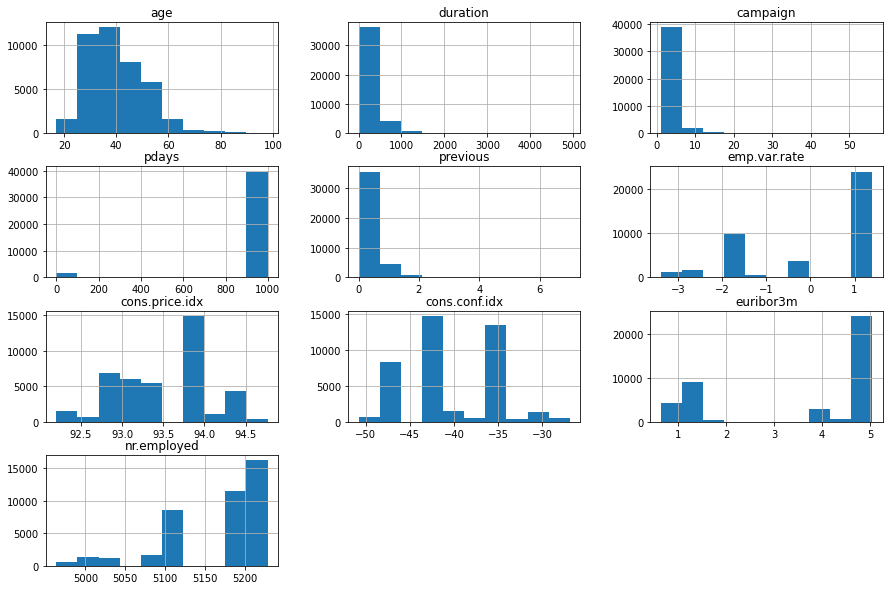

In [114]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

Density Plot

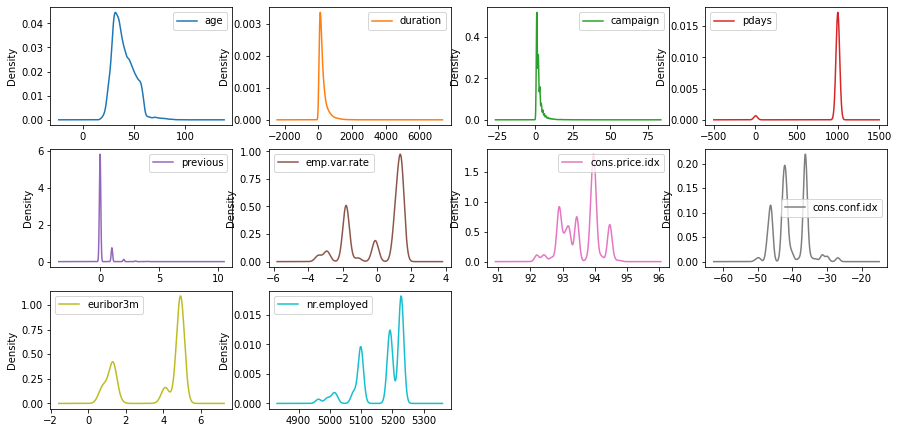

In [115]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

Vamos agora trabalhar com boxplots.

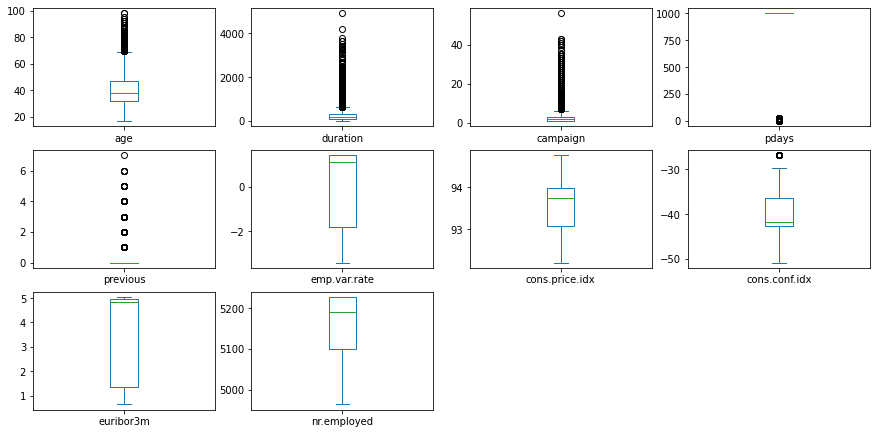

In [116]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais


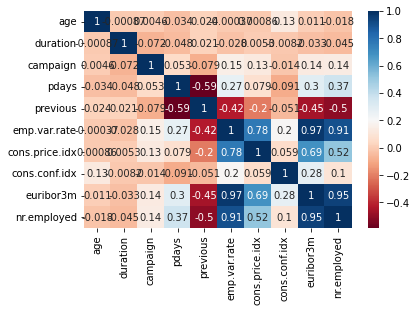

In [117]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

**scatter plot**

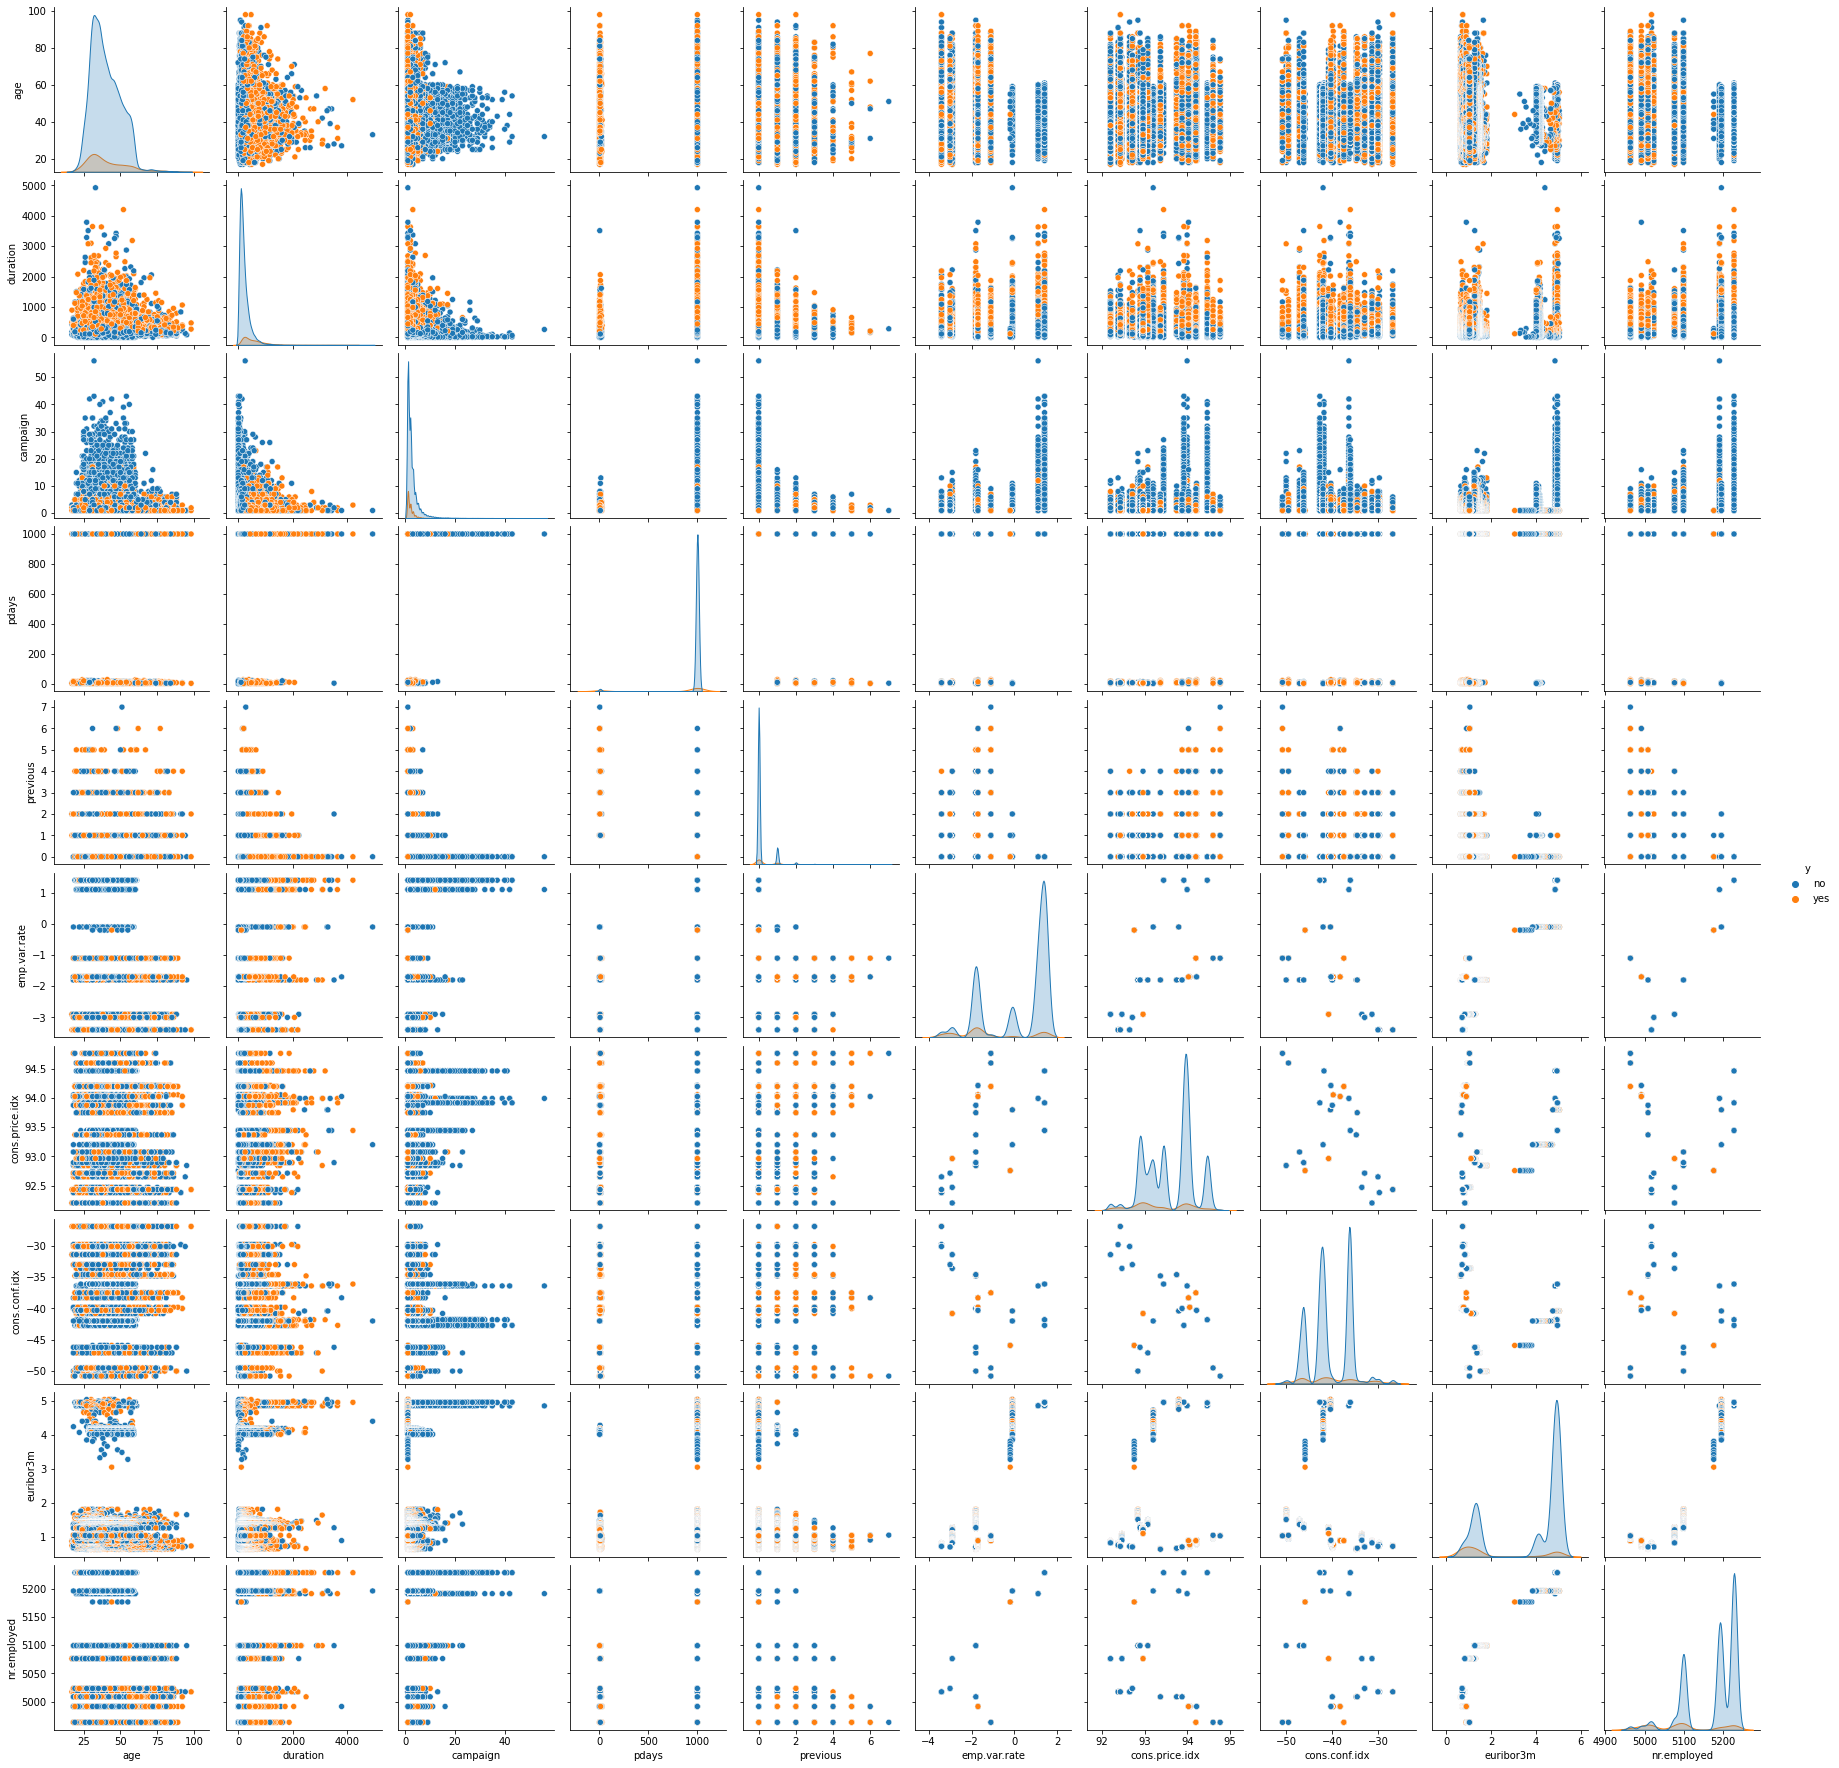

In [118]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "y", height = 2.5);

## 4. Pré-Processamento de dados


### 4.1. Tratamento de Missings e Limpeza

Sabemos que o datset Bank Marketing não tem missings aparentes, mas valores "0","999" e "unknown" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [5]:
# verificando nulls no dataset
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

 Label Encoder para transformando as colunas categóricas em dados numéricos

In [9]:
dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   duration           41188 non-null  int64  
 2   campaign           41188 non-null  int64  
 3   pdays              41188 non-null  int64  
 4   previous           41188 non-null  int64  
 5   emp.var.rate       41188 non-null  float64
 6   cons.price.idx     41188 non-null  float64
 7   cons.conf.idx      41188 non-null  float64
 8   euribor3m          41188 non-null  float64
 9   nr.employed        41188 non-null  float64
 10  job_label          41188 non-null  int64  
 11  marital_label      41188 non-null  int64  
 12  education_label    41188 non-null  int64  
 13  default_label      41188 non-null  int64  
 14  housing_label      41188 non-null  int64  
 15  loan_label         41188 non-null  int64  
 16  contact_label      411

In [7]:
label_encoder = LabelEncoder()

job_label = label_encoder.fit_transform(dataset.job)
marital_label = label_encoder.fit_transform(dataset.marital)
education_label = label_encoder.fit_transform(dataset.education)
default_label = label_encoder.fit_transform(dataset.default)
housing_label = label_encoder.fit_transform(dataset.housing)
loan_label = label_encoder.fit_transform(dataset.loan)
contact_label = label_encoder.fit_transform(dataset.contact)
month_label = label_encoder.fit_transform(dataset.month)
day_of_week_label = label_encoder.fit_transform(dataset.day_of_week)
poutcome_label = label_encoder.fit_transform(dataset.poutcome)


dataset['job_label'] = job_label
dataset['marital_label'] = marital_label
dataset['education_label'] = education_label
dataset['default_label'] = default_label
dataset['housing_label'] = housing_label
dataset['loan_label'] = loan_label
dataset['contact_label'] = contact_label
dataset['month_label'] = month_label
dataset['day_of_week_label'] = day_of_week_label
dataset['poutcome_label'] = poutcome_label

y_label = label_encoder.fit_transform(dataset.y)
dataset['y_label'] = y_label

In [8]:
dataset.drop(['y'], axis=1, inplace= True)
dataset.drop(['job'], axis=1, inplace= True)
dataset.drop(['marital'], axis=1, inplace= True)
dataset.drop(['education'], axis=1, inplace= True)
dataset.drop(['default'], axis=1, inplace= True)
dataset.drop(['housing'], axis=1, inplace= True)
dataset.drop(['loan'], axis=1, inplace= True)
dataset.drop(['contact'], axis=1, inplace= True)
dataset.drop(['month'], axis=1, inplace= True)
dataset.drop(['day_of_week'], axis=1, inplace= True)
dataset.drop(['poutcome'], axis=1, inplace= True)

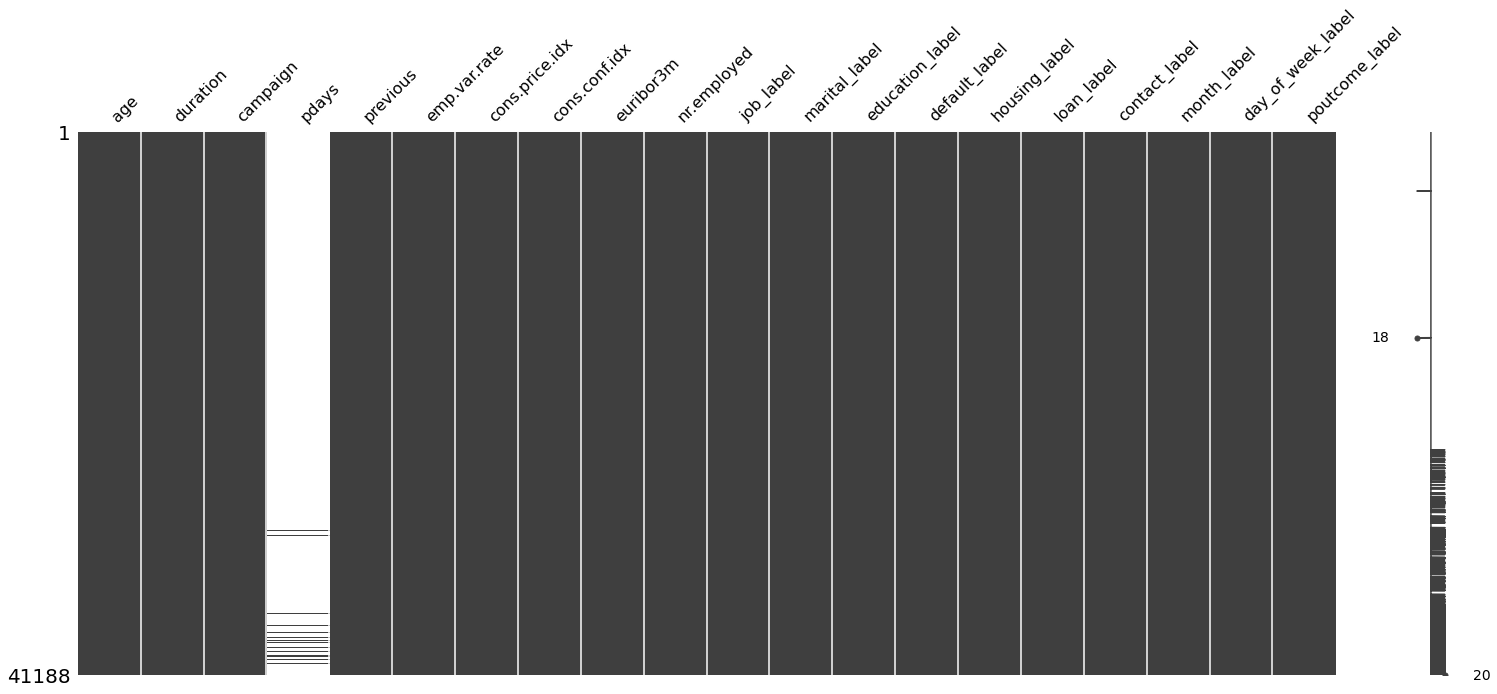

In [10]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(999, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

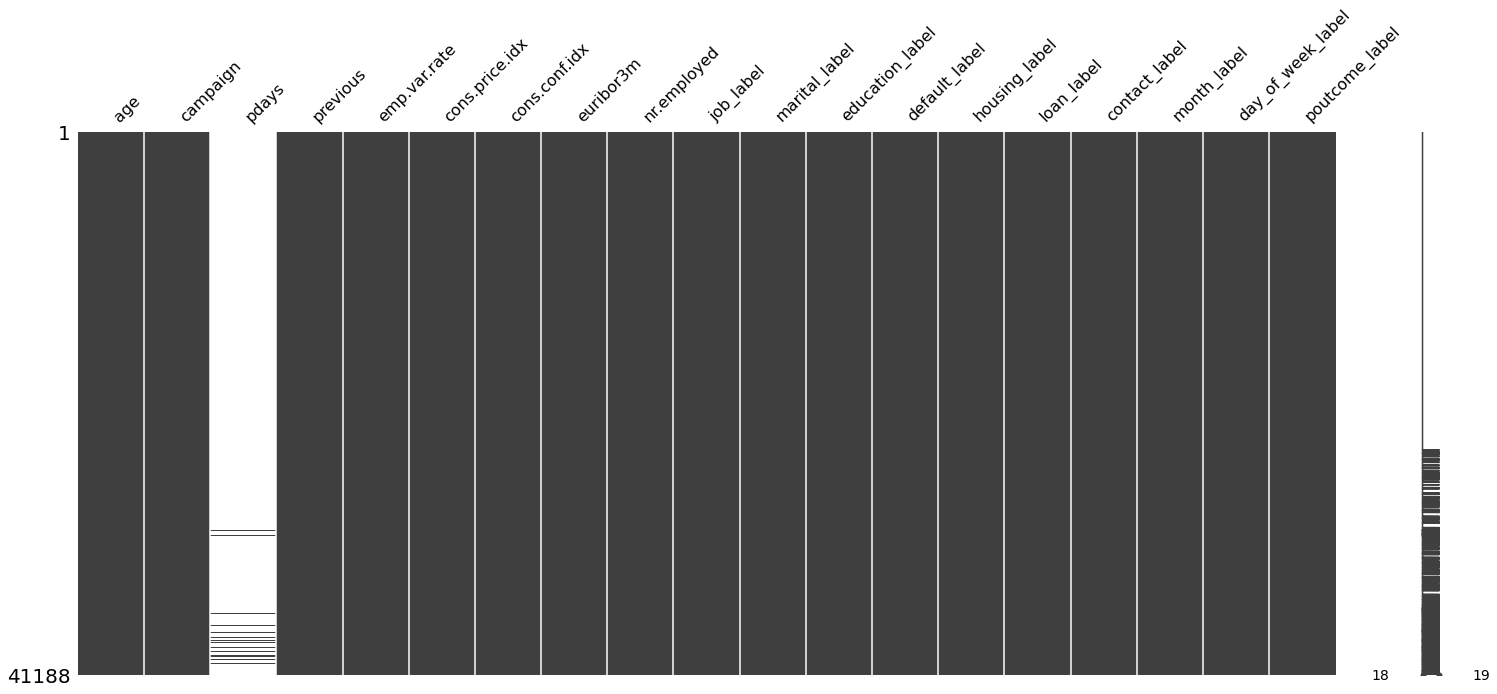

In [11]:
# removendo a coluna 'duration'
atributos.drop(['duration'], axis=1, inplace= True)

# removendo a coluna 'duration'
dataset.drop(['duration'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

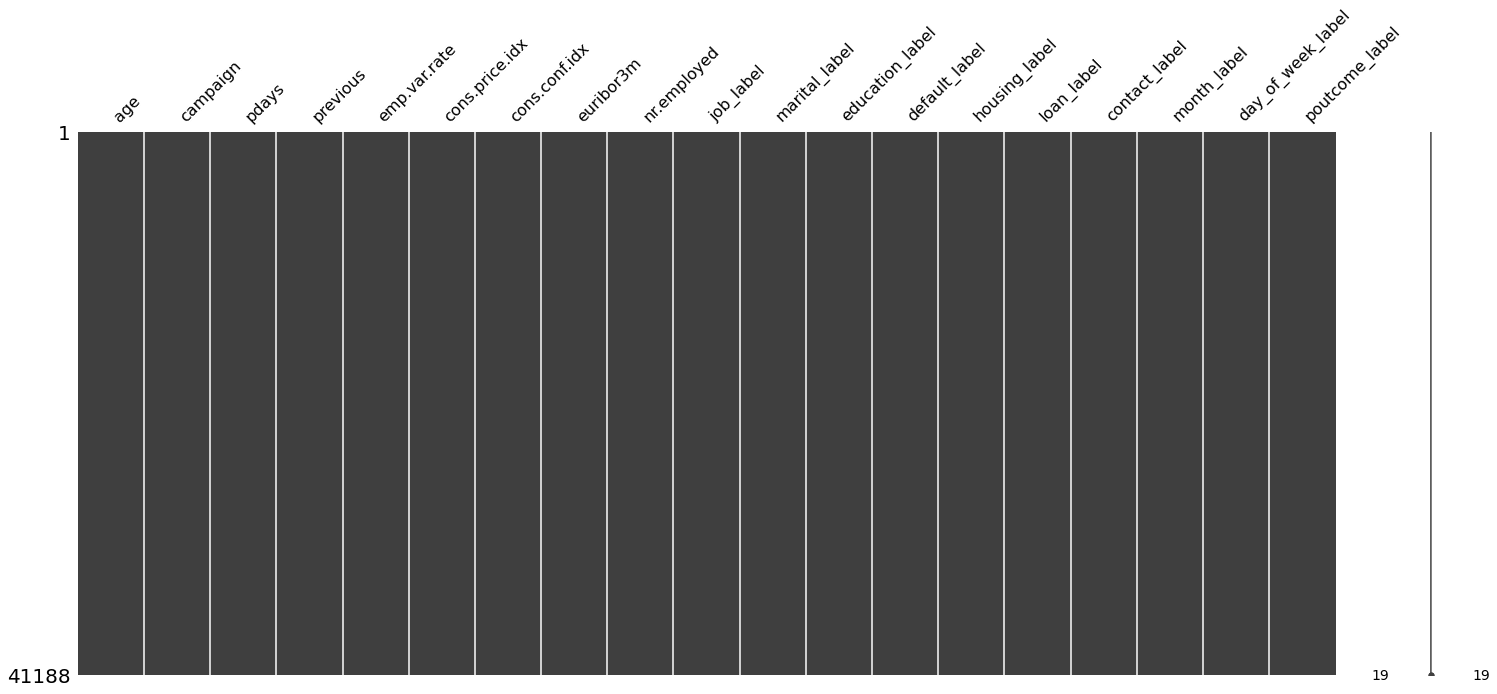

In [12]:
# substituindo os NaN de pdays por 0

atributos['pdays'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [13]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['y_label'] = dataset['y_label']

# exibindo as primeiras linhas
datasetSemMissings.head()

datasetSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   campaign           41188 non-null  int64  
 2   pdays              41188 non-null  float64
 3   previous           41188 non-null  int64  
 4   emp.var.rate       41188 non-null  float64
 5   cons.price.idx     41188 non-null  float64
 6   cons.conf.idx      41188 non-null  float64
 7   euribor3m          41188 non-null  float64
 8   nr.employed        41188 non-null  float64
 9   job_label          41188 non-null  int64  
 10  marital_label      41188 non-null  int64  
 11  education_label    41188 non-null  int64  
 12  default_label      41188 non-null  int64  
 13  housing_label      41188 non-null  int64  
 14  loan_label         41188 non-null  int64  
 15  contact_label      41188 non-null  int64  
 16  month_label        411

In [14]:
datasetSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   campaign           41188 non-null  int64  
 2   pdays              41188 non-null  float64
 3   previous           41188 non-null  int64  
 4   emp.var.rate       41188 non-null  float64
 5   cons.price.idx     41188 non-null  float64
 6   cons.conf.idx      41188 non-null  float64
 7   euribor3m          41188 non-null  float64
 8   nr.employed        41188 non-null  float64
 9   job_label          41188 non-null  int64  
 10  marital_label      41188 non-null  int64  
 11  education_label    41188 non-null  int64  
 12  default_label      41188 non-null  int64  
 13  housing_label      41188 non-null  int64  
 14  loan_label         41188 non-null  int64  
 15  contact_label      41188 non-null  int64  
 16  month_label        411

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [16]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:19]
y = array[:,19]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [17]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:19]
y_sm = array[:,19]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

## 5. Modelos de Classificação

### 5.1. Criação e avaliação de modelos: linha base

Usaremos a validação cruzada 10-fold (já detalhada anteriormente) e avaliaremos os modelos usando a métrica de acurácia.

In [18]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
#kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # sem estratificação
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # com estratificação

In [19]:
# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

ensemble:

In [20]:
np.random.seed(7) # definindo uma semente global

# definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os modelos e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

In [21]:
# Aqui iremos armazenar os resultados tanto para o dataset original quanto para o dataset sem missings
results = []
names = []

In [24]:
np.random.seed(7) # definindo uma semente global

# Avaliação dos modelos - dataset original

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.899757 (0.001775)
KNN: 0.889530 (0.004264)
CART: 0.841457 (0.005969)
NB: 0.835417 (0.007770)
SVM: 0.897269 (0.002328)
Bagging: 0.891745 (0.003583)
RF: 0.895387 (0.003344)
ET: 0.890561 (0.002886)
Ada: 0.900121 (0.001955)
GB: 0.900577 (0.002671)
Voting: 0.899090 (0.001882)


In [136]:
np.random.seed(7) # definindo uma semente global

# Aqui iremos armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Padronização do dataset original
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Normalização do dataset original
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines - datasets sem tratamento de missings
print("-- Datasets SEM tratamento de missings")
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Executando os pipelines - datasets com tratamento de missings
print("-- Datasets COM tratamento de missings")
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_sm, y_train_sm, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

-- Datasets SEM tratamento de missings
LR-orig: 0.900 (0.002)
KNN-orig: 0.890 (0.004)
CART-orig: 0.841 (0.006)
NB-orig: 0.835 (0.008)
SVM-orig: 0.897 (0.002)
Bag-orig: 0.892 (0.004)
RF-orig: 0.895 (0.003)
ET-orig: 0.891 (0.003)
Ada-orig: 0.900 (0.002)
GB-orig: 0.901 (0.003)
Vot-orig: 0.899 (0.002)
LR-padr: 0.900 (0.002)
KNN-padr: 0.893 (0.002)
CART-padr: 0.842 (0.006)
NB-padr: 0.835 (0.008)
SVM-padr: 0.901 (0.003)
Bag-padr: 0.892 (0.003)
RF-padr: 0.896 (0.003)
ET-padr: 0.891 (0.004)
Ada-padr: 0.900 (0.002)
GB-padr: 0.901 (0.003)
Vot-padr: 0.901 (0.002)
LR-norm: 0.900 (0.002)
KNN-norm: 0.891 (0.002)
CART-norm: 0.842 (0.006)
NB-norm: 0.835 (0.008)
SVM-norm: 0.899 (0.002)
Bag-norm: 0.892 (0.004)
RF-norm: 0.896 (0.003)
ET-norm: 0.890 (0.003)
Ada-norm: 0.900 (0.002)
GB-norm: 0.901 (0.003)
Vot-norm: 0.899 (0.002)
-- Datasets COM tratamento de missings
LR-orig: 0.897 (0.002)
KNN-orig: 0.889 (0.004)
CART-orig: 0.841 (0.007)
NB-orig: 0.834 (0.008)
SVM-orig: 0.887 (0.000)
Bag-orig: 0.892 (0.003)

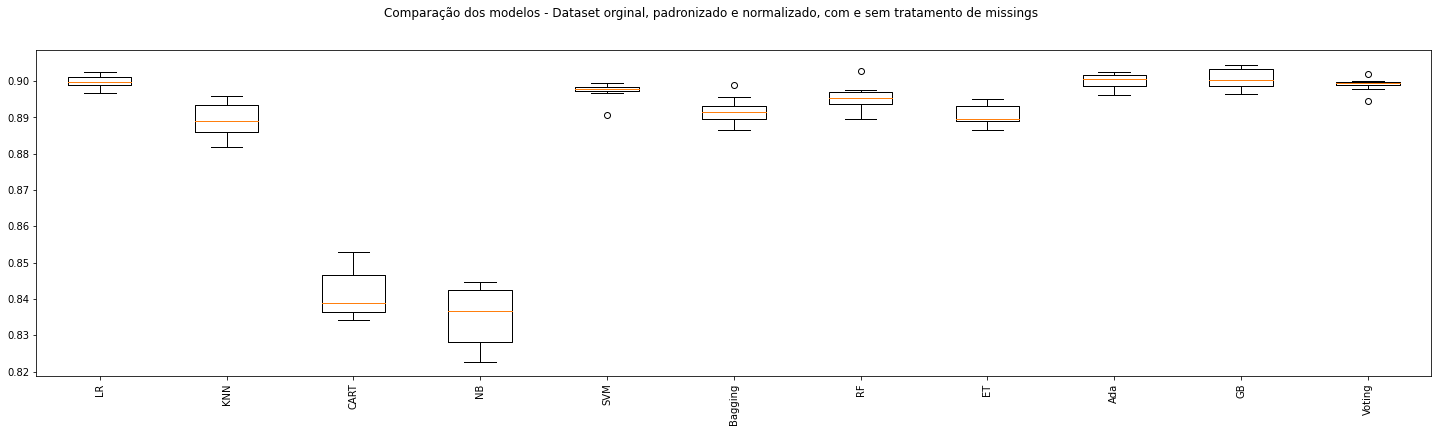

In [25]:
# Comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos modelos - Dataset orginal, padronizado e normalizado, com e sem tratamento de missings') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

Neste primeiro experimento, rodamos 66 configurações: 11 diferentes algoritmos e 6 diferentes visões do nosso dataset!

## 6. Finalização do Modelo

Analisando os resultados até aqui, verificamos que o modelo que mostrou melhor acurácia média para o problema foi o que usou Extra Trees como algoritmo (apesar de ter um  desvio padrão relativamente alto). Relembrando o Experimento 1 (uma vez que o Experimento 2 não trouxe resultados melhores), nossos resultados foram:

*Para o dataset **Sem tratamento de missings**, os melhores modelos em termos de acurácia foram: ET-orig (0,779), Bag-orig (0,77), LR-padr	(0,77), GB-orig	(0,769) e Bag-padr (0,767). Já para o dataset **Com tratamento de missings**, os melhores modelos foram: Vot-orig (0,774), ET-norm (0,77), SVM-norm (0,766), LR-padr (0,764) e RF-norm (0,764).*

Examinando também o desvio padrão, poderíamos, por exemplo, optar por utilizar o modelo construído com o algoritmo de Regressão Logística, com os dados sem tratamento de missings, visão padronizada. Considerando o dataset "Sem tratamento de missings", este modelo ficou na 2a posição em termos de acurácia média, mas com um desvio padrão menor do que o que alcançou a 1a posição. Além disso, explicar como funciona este modelo para os usuários não técnicos tende a ser mais simples.

A seguir, finalizaremos este modelo, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada) e faremos predições para o conjunto de dados de teste que foi separado logo no início do exemplo, a fim de confirmarmos nossas descobertas.

Primeiro, iremos realizar a padronização dos dados de entrada. Depois, treinaremos o modelo e exibiremos a acurácia de teste, a matriz de confusão e o relatório de classificação.

In [29]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = GradientBoostingClassifier(n_estimators=num_trees)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8335761107064822
[[6663  647]
 [ 724  204]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91      7310
         1.0       0.24      0.22      0.23       928

    accuracy                           0.83      8238
   macro avg       0.57      0.57      0.57      8238
weighted avg       0.83      0.83      0.83      8238



Por meio do conjunto de teste, verificamos que alcançamos uma acurácia de 75,00% em dados não vistos. Valores semelhantes são esperados quando este modelo estiver executando em produção e fazendo predições para novos dados.

In [30]:
# Preparação do modelo com TODO o dataset (e não apenas a base de treino)
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

GradientBoostingClassifier()

## 7. Aplicando o modelo em dados não vistos

In [47]:
# Novos dados - não sabemos a classe!
data = {'age': [33,39,42],
      'campaign': [1,1,1],
      'pdays': [0.0,0.0,0.0],
      'previous': [0,0,0],
      'emp.var.rate': [1.1,1,1],
      'cons.price.idx': [93.789,93.994,93.994],
      'cons.conf.idx': [-40.4,-36.4,-36.4],
      'euribor3m': [4.857,4.857,4.857],
      'nr.employed': [5191.0,5191.0,5191.0],
      'job_label': [7,4,6],
      'marital_label': [1,0,2],
      'education_label': [5,1,3],
      'default_label': [0,1,1],
      'housing_label': [0,1,0],
      'loan_label': [0,0,0],
      'contact_label': [1,1,1],
      'month_label': [10,3,1],
      'day_of_week_label': [2,1,0],
      'poutcome_label': [0,1,0],  
        }

atributos = ['age',
'campaign',
'pdays',
'previous',
'emp.var.rate',
'cons.price.idx',
'cons.conf.idx',
'euribor3m',
'nr.employed',
'job_label',
'marital_label',
'education_label',
'default_label',
'housing_label',
'loan_label',
'contact_label',
'month_label',
'day_of_week_label',
'poutcome_label']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:19].astype(float)
print(X_entrada)

[[ 3.3000e+01  1.0000e+00  0.0000e+00  0.0000e+00  1.1000e+00  9.3789e+01
  -4.0400e+01  4.8570e+00  5.1910e+03  7.0000e+00  1.0000e+00  5.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  1.0000e+01  2.0000e+00
   0.0000e+00]
 [ 3.9000e+01  1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  9.3994e+01
  -3.6400e+01  4.8570e+00  5.1910e+03  4.0000e+00  0.0000e+00  1.0000e+00
   1.0000e+00  1.0000e+00  0.0000e+00  1.0000e+00  3.0000e+00  1.0000e+00
   1.0000e+00]
 [ 4.2000e+01  1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  9.3994e+01
  -3.6400e+01  4.8570e+00  5.1910e+03  6.0000e+00  2.0000e+00  3.0000e+00
   1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  1.0000e+00  0.0000e+00
   0.0000e+00]]


In [48]:
# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-6.74021417e-01 -5.65921974e-01 -5.14944340e+00 -3.49494284e-01
   6.48092267e-01  3.68561612e-01  2.21687838e-02  7.12459879e-01
   3.31679907e-01  9.11226813e-01 -2.83741498e-01  5.86399178e-01
  -5.13599691e-01 -1.08770698e+00 -4.52490616e-01  1.31826996e+00
   2.48669820e+00 -3.30075271e-03 -2.56309793e+00]
 [-9.82677548e-02 -5.65921974e-01 -5.14944340e+00 -3.49494284e-01
   5.84436139e-01  7.22722470e-01  8.86446562e-01  7.12459879e-01
   3.31679907e-01  7.66222683e-02 -1.92606089e+00 -1.28585983e+00
   1.94532674e+00 -7.27897791e-02 -4.52490616e-01  1.31826996e+00
  -5.30547382e-01 -7.18834451e-01  1.92622072e-01]
 [ 1.89609076e-01 -5.65921974e-01 -5.14944340e+00 -3.49494284e-01
   5.84436139e-01  7.22722470e-01  8.86446562e-01  7.12459879e-01
   3.31679907e-01  6.33025298e-01  1.35857790e+00 -3.49730329e-01
   1.94532674e+00 -1.08770698e+00 -4.52490616e-01  1.31826996e+00
  -1.39261755e+00 -1.43436815e+00 -2.56309793e+00]]


In [49]:
# Estimativa de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 0. 0.]
